# Demonstration - How does PCA work

Pieter Overdevest  
2022-12-09

For suggestions/questions regarding this notebook, please contact
[Pieter Overdevest](https://www.linkedin.com/in/pieteroverdevest/)
(pieter@innovatewithdata.nl).

> **Download this notebook**
>
> You can [download this page as a Jupyter
> notebook](../../../assets/notebooks/pca.ipynb) (right-click *“Save
> Link As …”*) if you want to work directly on the exercises.

#### Aim

To explain how PCA works with various data sets.

#### Initialization

We start by importing a few packages,

In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from numpy.random import rand

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random

random.seed(10)

Note, ‘%matplotlib inline’ ensures matplotlib graphs will be included in
your notebook.

In [2]:
%matplotlib inline

#### Get the data

With this notebook you can test PCA on four data sources: 1. Iris data -
A commonly used dataset to test classification models; 2. USArrests
data - Used in ISLR to explain PCA, see chapter 10 (Ed. 1). Therefore, I
included this option also in this notebook; 3. Dummy data I - Allows to
study the effect of correlations between features on the PCA; 4. Dummy
data II - This set is also used in explainer `t-sne`. Here, we check
what we can find out using PCA.

**IMPORTANT: The same analysis can be done with either of the four data
sets, just select the one you want.**

In [3]:
#c_dataset = "iris"
#c_dataset = "usarrests"
#c_dataset = "dummy_i"
c_dataset = "dummy_ii"

##### Iris dataset

The Iris dataset is a very simple dataset available through the
`datasets` packages. It contains 150 observations and five features. One
feature describes the variety the observation belongs to, and is used as
the response variable in classification models. The data contains 50
observations per variety. The other four features describe the geometry
of the flower (petal length, petal width, sepal length, and sepal
width). We define `y`-related objects (target) to be used when plotting
the data; not for predictions.

In [4]:
if c_dataset == "iris":

    # The 'data_original' object is a collection of data objects, that we each assign to other objects.
    data_original   = datasets.load_iris()

    # Assign the feature names (l_X_names), the predictor data (df_X), and the target variable (ps_y)
    # to individual objects. Object ps_y is converted to a Pandas Series to have it of the same type as in
    # case of USArrests data.
    l_X_names = list(data_original.feature_names)
    m_X       = data_original.data
    df_X      = pd.DataFrame(m_X, columns = l_X_names)
    ps_y      = pd.Series([data_original.target_names[i] for i in data_original.target])

##### USArrests dataset

The USArrests dataset consists of five features - ‘Unnamed: 0’ (state
name), ‘Murder’, ‘Assault’, ‘UrbanPop’, and ‘Rape’. Each row represents
the data for a state, there are 50 rows for 50 states.

In [5]:
if c_dataset == "usarrests":

    data_original   = pd.read_csv("https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/USArrests.csv")

    # Assign the predictor data (df_X), the feature names (l_X_names) and the target variable (ps_y)
    # to individual objects.
    df_X      = data_original.drop('Unnamed: 0', axis = 1)
    m_X       = df_X.values
    l_X_names = list(df_X.columns.values)
    ps_y      = data_original['Unnamed: 0']

##### Dummy dataset I

We created some dummy data as this allows us to choose the correlation
between features. This then, allows us to investigate their influence on
the PCA.

In [6]:
if c_dataset == "dummy_i":

    # Assign the predictor data (df_X), the feature names (v_df_X_names) and the target variable (ps_y)
    # to individual objects.
    v_x1 = 50 + 20 * rand(150)
    v_x2 = 4 * v_x1 + 100 + 10  * rand(150) # x1 and x2 are highly   correlated
    v_x3 = 8 * v_x1 + 100 + 300 * rand(150) # x1 and x3 are somewhat correlated
    v_x4 = 1000 + 100 * rand(150)           # x1 and x2 are not      correlated

    m_X       = np.array([v_x1, v_x2, v_x3, v_x4]).transpose()
    l_X_names = ['x1', 'x2', 'x3', 'x4']
    df_X      = pd.DataFrame(m_X, columns = l_X_names)
    ps_y      = pd.Series(["dummy" for i in range(150)])

    # Initialization
    fig, ax = plt.subplots(figsize = (10,3))
    fig.subplots_adjust(wspace = 1) 

    # To prevent deprecation warning.
    ax.remove()

    # x1 vs x2
    plt.subplot(1,3,1)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('x1 and x2 are highly correlated')
    plt.scatter(v_x1, v_x2)

    # x1 vs x3
    plt.subplot(1,3,2)
    plt.xlabel('x1')
    plt.ylabel('x3')
    plt.title('x1 and x3 are somewhat correlated')
    plt.scatter(v_x1, v_x3)

    # x1 vs x4
    plt.subplot(1,3,3)
    plt.xlabel('x1')
    plt.ylabel('x4')
    plt.title('x1 and x4 are not correlated')
    plt.scatter(v_x1, v_x4);

##### Dummy dataset II

We create a dummy data set with non-linear relationships between the
three features, `x`, `y`, and `z`. In particular, the data set has a
‘bucket’-like data structure in which another cluster is situated.
Below, we show a 3D scatter plot made with Plotly. This allows us to
rotate the box holding the data around the x, y, and z-axes, to observe
the data from different directions. In addition, the data have been
projected on each of the three planes constructed by two of the three
axes. This helps to understand how data are overlapping in the concerned
directions.

In [7]:
if c_dataset == "dummy_ii":

    random.seed(10)

    # Cluster A (red)
    l_a_x = list( 5 + 3 * rand(25))
    l_a_y = list( 5 + 3 * rand(25))
    l_a_z = list(10 + 1 * rand(25))

    # Cluster B (green)
    l_b_x = list( 5 + 3 * rand(25))
    l_b_y = list(15 + 3 * rand(25))
    l_b_z = list( 5 + 1 * rand(25))

    # Cluster C (blue)
    l_c_x = list(14 + 3 * rand(25))
    l_c_y = list(12 + 3 * rand(25))
    l_c_z = list(15 + 1 * rand(25))

    # Cluster D (magenta)
    l_d_x = list( 5 + 3 * rand(50))
    l_d_y = list(15 + 3 * rand(50))
    l_d_z = list( 7 + 1 * rand(50))

    # Cluster E (orange)
    n_radius   = 5
    n_x_center = 15
    n_y_center = 10
    n_z_center = 15
    n_data     = 250

    v_phi   = np.pi * rand(n_data)
    v_theta = np.pi * rand(n_data)

    v_e_x = n_x_center + n_radius * np.sin(v_phi) * np.cos(v_theta)
    v_e_y = n_y_center + n_radius * np.sin(v_phi) * np.sin(v_theta) * 2
    v_e_z = n_z_center + n_radius * np.cos(v_phi)

    l_e_x = list(v_e_x)
    l_e_y = list(v_e_y)
    l_e_z = list(v_e_z)

    # Cluster label.
    ps_y = pd.Series(["A"]*25 + ["B"]*25 + ["C"]*25 + ["D"]*50 + ["E"]*n_data)

    # Concatenation of cluster data.
    l_X_names = ['x', 'y', 'z']
    m_X          = np.array([
        l_a_x + l_b_x + l_c_x + l_d_x + l_e_x,
        l_a_y + l_b_y + l_c_y + l_d_y + l_e_y,
        l_a_z + l_b_z + l_c_z + l_d_z + l_e_z
    ]).transpose()

    # Convert to dataframe, df_X.
    df_X  = pd.DataFrame(    
        m_X,
        columns = l_X_names
    )

    # Create copy of df_X.
    df_data = df_X.copy()

    # Add cluster label to df_X.
    df_data['label'] = ps_y

    # Create shadows on x, y, and z planes.
    df_data_x = df_data.copy()
    df_data_y = df_data.copy()
    df_data_z = df_data.copy()

    df_data_x['x'] = 0
    df_data_y['y'] = 0
    df_data_z['z'] = 0

    # Concatenate data.
    df_data_total = pd.concat([
        
        df_data,
        df_data_x,
        df_data_y,
        df_data_z
    ], axis = 0)

    # Plot the data.
    fig = px.scatter_3d(

        df_data_total, 
        x                  = 'x',
        y                  = 'y', 
        z                  = 'z',
        color              = 'label',
        color_discrete_map = {"A": 'red', "B": 'green', "C": 'blue', "D": 'magenta', "E": 'orange'},
        range_x            = (0,25),
        range_y            = (0,25),
        range_z            = (0,25)
    )

    fig.update_layout(
        autosize = True,
        width    = 800,
        height   = 800)
        
    fig.show()

Unable to display output for mime type(s): application/vnd.plotly.v1+json

#### Some descriptive statistics

We print some statistics for the user.

In [8]:
# Show dimensions and names of the data.
print("Shape and feature names of 'df_X':")
print(f"Shape:         {m_X.shape}")
print(f"Feature names: {l_X_names}")
print("")
print("Target variable 'ps_y':")
print(f"Shape:         {ps_y.shape}")
print(f"Unique values: {ps_y.unique()}")
print("")
print("Sample of 'df_X':")
print(df_X.head(5))

Shape and feature names of 'df_X':
Shape:         (375, 3)
Feature names: ['x', 'y', 'z']

Target variable 'ps_y':
Shape:         (375,)
Unique values: ['A' 'B' 'C' 'D' 'E']

Sample of 'df_X':
          x         y          z
0  6.273261  6.278763  10.851325
1  7.426644  6.404353  10.349950
2  6.433490  7.576229  10.281439
3  7.972809  7.122447  10.171211
4  5.108296  5.303683  10.919720

#### Pre-processing

In this explainer we apply PCA to a simple dataset. We make use of the
data frame `df_X` and vector `ps_y` objects that we defined above. As
with other transformations, for Principle Component Analysis to work
properly; i.e., give each feature equal weight, we scale the predictor
data.

In [9]:
m_X_scaled = StandardScaler().fit_transform(m_X)

m_X_scaled[0:5,]

array([[-1.5212625 , -2.37070595, -0.53937653],
       [-1.24957695, -2.33223599, -0.64942229],
       [-1.48351965, -1.97327366, -0.66445953],
       [-1.12092471, -2.11227369, -0.68865312],
       [-1.79567631, -2.66938685, -0.5243648 ]])

We create a PCA object (`pca_`) that we use to transform the scaled
predictor data to its principle components. We define an object
`n_components` as we will need the number of principle components at a
later moment as well. The term `n_components = n_components` in the
`PCA()` function below may look a bit confusing. To explain this, the
first `n_components` refers to the parameter name in the `PCA()`
function, and the second `n_components` refers to the object that we
define and assign a whole number (integer) to.

In [10]:
# Number of features in original data.
n_components = m_X.shape[1]

# Print results.
print(f"Number of features in the original data: {n_components}")

# Create pca object
pca_  = PCA(n_components = n_components)

Number of features in the original data: 3

The object `pca_` is updated by applying the scaled data to it, creating
a matrix `m_pc` containing the principle components.

In [11]:
m_pc = pca_.fit_transform(m_X_scaled)

We reformat matrix `m_pc` to data frame `df_pc` with feature names
referring to the principle component, 1, 2, etc., depending on the
number of principle components requested in the `PCA()` function. We use
a list-comprehension to construct the column names `v_pc_names`, see
also explainer `list-comprehensions`.

In [12]:
l_pc_names = ["PC" + str(i+1) for i in range(n_components)]
l_pc_names

['PC1', 'PC2', 'PC3']

In [13]:
df_pc = pd.DataFrame(

    data    = m_pc,
    columns = l_pc_names
)

# Show first five rows.
df_pc.head(5)

Let’s take a moment to discuss the `components_` attribute of the `pca_`
object, see below. This attribute results in an array containing the
so-called ‘loadings’, see section ‘12.2.1 What Are Principal
Components?’ in ISLR ([Ed.
2](https://hastie.su.domains/ISLR2/ISLRv2_website.pdf)). We transpose
the matrix so that each column contains the loadings per principle
component. The number of rows is equal to the number of features in the
original data. The matrix is converted to a data frame, so we can assign
column names and indices (row names).

In case of the USArrest data set, we can compare the data frame to Table
12.1 in ISLR (Ed. 2). We observe in Table 12.1 that the values for PC2
have an opposite sign of what we find in our calculation. PCA is simply
a mathematical transformation. If you change the signs of the components
(score), you do not change the variance that is contained in it.
Moreover, the loadings then also change sign, so the interpretation
stays exactly the same
([ref](https://stats.stackexchange.com/questions/88880/does-the-sign-of-scores-or-of-loadings-in-pca-or-fa-have-a-meaning-may-i-revers)).

In [14]:
df_loadings = pd.DataFrame(
    
    data    = np.transpose(pca_.components_),
    columns = l_pc_names,
    index   = l_X_names
)

df_loadings

#### Biplot

The two principle components in a biplot show clusters of observations
based on their similarity. Data closer to each other are more similar.
Loadings - indicated by the arrows - show how strongly each feature
influences a principal component.

Usually, biplots plot the first principle component against the second
principle component, as shown in the figure below. The arrows indicate
the loadings of the first and second principle component.

##### Iris dataset

What does it means that, 1) the ‘setosa’ data is fully separated from
versicolor and virginica in terms of being able to accurately predict
the category? 2) `petal width (cm)` and `petal length (cm)` arrows point
in the same direction? 3) `sepal length (cm)` arrow in opposite
direction of the previous two? 4) `sepal width (cm)` arrow almost
orthogonally to the other three?

If you do not have an answer to questions 2-4, continue, check the
correlation heatmap below, and give it another go.

##### USArrests dataset

What does it means that,

1.  `Murder` and `Assault` arrows point in the same direction?
2.  `UrbanPop` arrow points almost orthogonally to ‘Murder’ and
    ‘Assault’?

If you do not have an answer readily available, continue, check the
correlation heatmap below, and give it another go.

##### Dummy Dataset II

We observe that cluster C - situated inside ‘bucket’ cluster E - is
separable by the first two components.

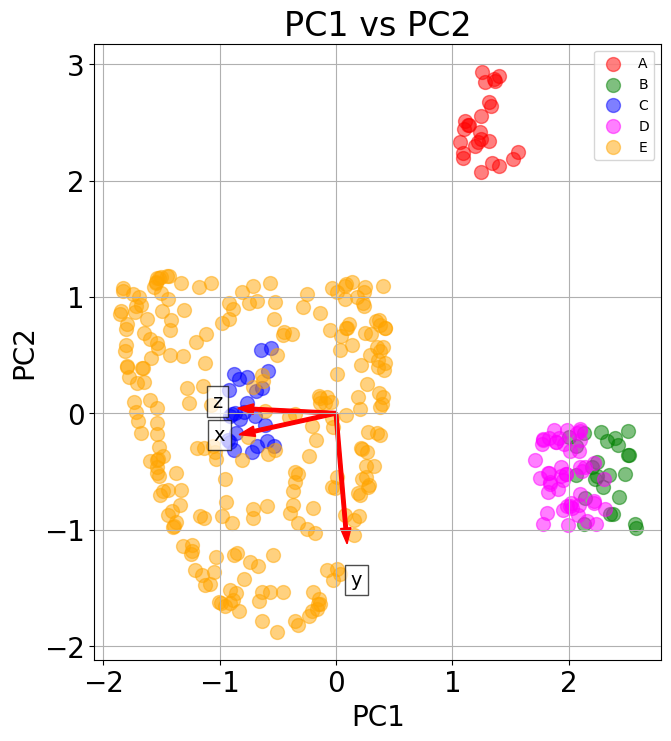

In [15]:
# Initialization
fig, ax = plt.subplots(figsize = (8,8))

plt.xlabel('PC1', fontsize = 20)
plt.ylabel('PC2', fontsize = 20)
plt.title('PC1 vs PC2', fontsize = 24)
plt.tick_params(labelsize = 20)
ax.set_aspect('equal')

# If Iris dataset or Dummy II dataset:
if c_dataset in ["iris", "dummy_ii"]:

    v_unique_target = ps_y.unique() # unique values in ps_y

    v_color_source = ['red', 'green', 'blue', 'magenta', 'orange']

    v_color = v_color_source[0:len(v_unique_target)]

    for target, color in zip(v_unique_target, v_color):

        indicesToKeep = ps_y == target

        ax.scatter(
            
            x     = df_pc.loc[indicesToKeep, 'PC1'],
            y     = df_pc.loc[indicesToKeep, 'PC2'],
            c     = color,
            s     = 100,
            alpha = 0.5)
        
    ax.legend(v_unique_target)


# If USArrest dataset or Dummy I dataset:
else:

    ax.scatter(
            
            x     = df_pc.PC1,
            y     = df_pc.PC2,     
            s     = 100,
            alpha = 0.5)


# Loading vectors.
for index, row in df_loadings.iterrows():

    ax.arrow(x = 0, y = 0, dx = row[0], dy = row[1], color = 'r', width=.03)
    ax.text(x = row[0]*1.5, y = row[1]*1.5, s = index, fontsize = 14, bbox={'facecolor': 'white', 'alpha': 0.7})

ax.grid();

To demonstrate how the principle components are constructed, we
calculate the first principle component ‘by hand’ using the scaled data
and the loadings given in the `components_` attribute. We show the first
20 elements in the ‘hand-calculated’ PC1 and we show the first 20 data
in PC1 in `m_pc`. Finally, we subtract the two routes to show they are
the same, i.e., the difference less than 1e-14.

In [16]:
if c_dataset in ['iris', 'usarrests', 'dummy_i']:
    
    v_pc1_calculated = \
    df_loadings.PC1[0] * m_X_scaled[:,0] + \
    df_loadings.PC1[1] * m_X_scaled[:,1] + \
    df_loadings.PC1[2] * m_X_scaled[:,2] + \
    df_loadings.PC1[3] * m_X_scaled[:,3]

    print(v_pc1_calculated[0:20])
    print("--------")
    print(all(v_pc1_calculated[0:20] - m_pc[0:20, 0] < 1e-14))

else:

    v_pc1_calculated = \
    df_loadings.PC1[0] * m_X_scaled[:,0] + \
    df_loadings.PC1[1] * m_X_scaled[:,1] + \
    df_loadings.PC1[2] * m_X_scaled[:,2]

    print(v_pc1_calculated[0:20])
    print("--------")
    print(all(v_pc1_calculated[0:20] - m_pc[0:20, 0] < 1e-14))

[1.24841724 1.13932472 1.34406129 1.09551317 1.40487497 1.28061344
 1.09894333 1.06367595 1.56541804 1.33283793 1.10720534 1.247973
 1.2210885  1.3593431  1.5207161  1.19727484 1.13341488 1.08992328
 1.36334553 1.25725819]
--------
True

#### Explained variance / Scree Plot

The additional variance that is explained by each subsequent principle
component is captured by the `explained_variance_` attribute.

In [17]:
pca_.explained_variance_

array([1.69113802, 1.01060957, 0.3062738 ])

The fraction (ratio) of the additionally explained variance is captured
by the `explained_variance_ratio_` attribute.

In [18]:
pca_.explained_variance_ratio_

array([0.56220944, 0.33597154, 0.10181902])

To clarify how the ratio is constructed, we calculate fraction for PC1
‘by hand’, and observe that it matches the first values in
`pca_.explained_variance_ratio_`

In [19]:
pca_.explained_variance_[0] / sum(pca_.explained_variance_)

0.5622094391038288

The accumulated fraction is calculated using `np.cumsum`.

In [20]:
np.cumsum(pca_.explained_variance_ratio_)

array([0.56220944, 0.89818098, 1.        ])

The explained variance is plotted in a Scree plot. It displays how much
variation each principal component is able to capture from the data.

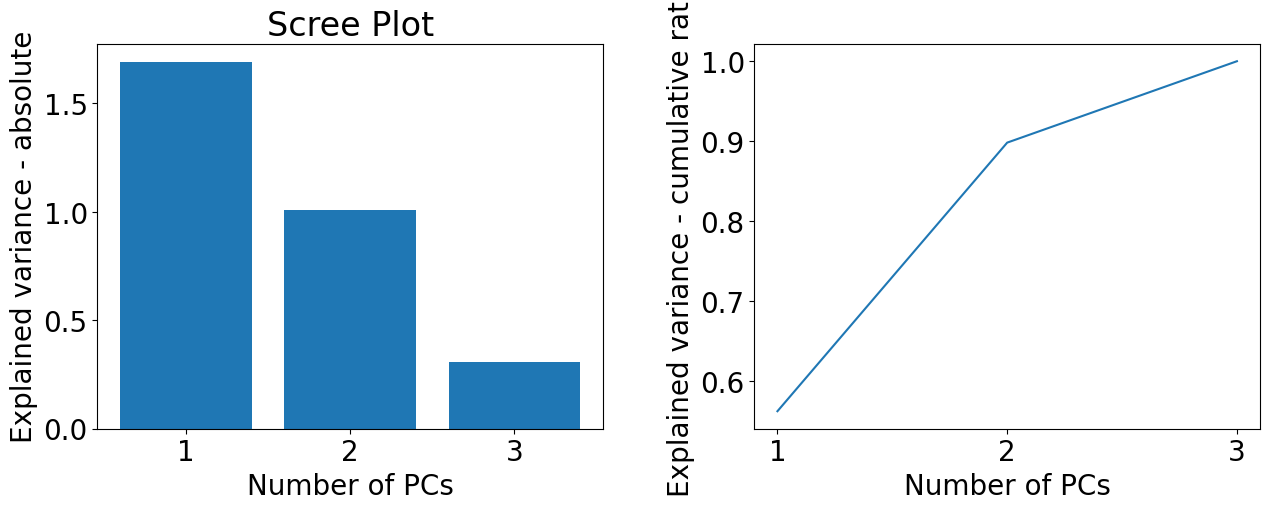

In [21]:
# Initialization
fig, ax = plt.subplots(figsize = (15,5))
fig.subplots_adjust(wspace = 0.3) 

# To prevent deprecation warning.
ax.remove()

# Scree Plot
plt.subplot(1,2,1)
plt.xlabel('Number of PCs', fontsize = 20)
plt.ylabel('Explained variance - absolute', fontsize = 20)
plt.title('Scree Plot', fontsize = 24)
plt.tick_params(labelsize = 20)
plt.locator_params(axis="x", integer=True)
plt.bar(range(1, n_components+1), pca_.explained_variance_)

# Cumulative ratio
plt.subplot(1,2,2)
plt.xlabel('Number of PCs', fontsize = 20)
plt.ylabel('Explained variance - cumulative ratio', fontsize = 20)
plt.title(' ', fontsize = 24)
plt.tick_params(labelsize = 20)
plt.locator_params(axis="x", integer=True)
plt.plot(range(1, n_components+1), np.cumsum(pca_.explained_variance_ratio_));



#### Correlation between features and principle components

By design the principle components are constructed such that all
components are orthogonal (perpendicular) to each other. We check this
by calculating the correlations between each pair. To warm up, we do
this for the original data first. As typically is the case, some
features are correlated and some are not.

In case of: \* Iris data set, `petal width (cm)` and `petal length (cm)`
are highly correlated. Will it matter that we did not scale the data? \*
Dummy II data set, `x` and `z` are highly correlated.

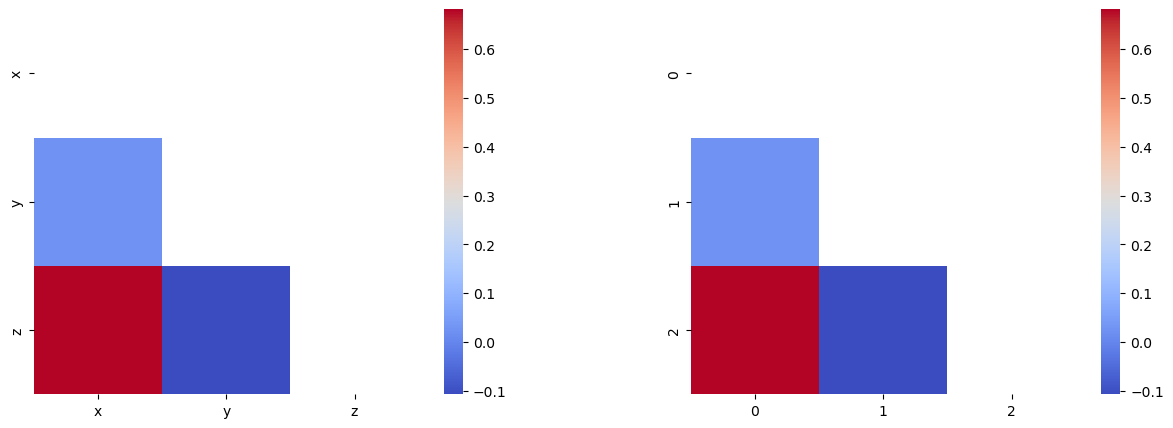

In [22]:
fig, ax = plt.subplots(figsize = (15,5))
fig.subplots_adjust(wspace = 0.3) 

# To prevent deprecation warning.
ax.remove()

plt.subplot(1,2,1)
df_cor = df_X.corr()
matrix = np.triu(df_cor)
sns.heatmap(df_cor, square=True, cmap= 'coolwarm', mask = matrix);

plt.subplot(1,2,2)
df_cor = pd.DataFrame(m_X_scaled).corr()
matrix = np.triu(df_cor)
sns.heatmap(df_cor, square=True, cmap= 'coolwarm', mask = matrix);

Now, we do the same for the principle components. And, are the principle
components correlated?

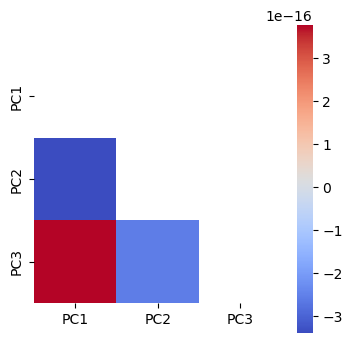

In [23]:
plt.rcParams['figure.figsize'] = (4, 4)

df_cor = df_pc.corr()
matrix = np.triu(df_cor)
sns.heatmap(df_cor, square=True, cmap= 'coolwarm', mask = matrix);

And by looking at the numbers…

In [24]:
df_pc.corr()

Well done! You reached the end of the PCA explainer.